In [1]:
# Import library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [5]:
# Preprocessing: Label Encoding fitur kategori
le = LabelEncoder()
for col in ['Age', 'Income', 'Student', 'Credit_Rating']:
    df[col] = le.fit_transform(df[col])

In [6]:
# Pisahkan fitur dan target
X = df.drop("Buys_Computer", axis=1)
y = df["Buys_Computer"]

In [7]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [9]:
# Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.805
Confusion Matrix:
 [[ 57  14]
 [ 25 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        71
           1       0.88      0.81      0.84       129

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200



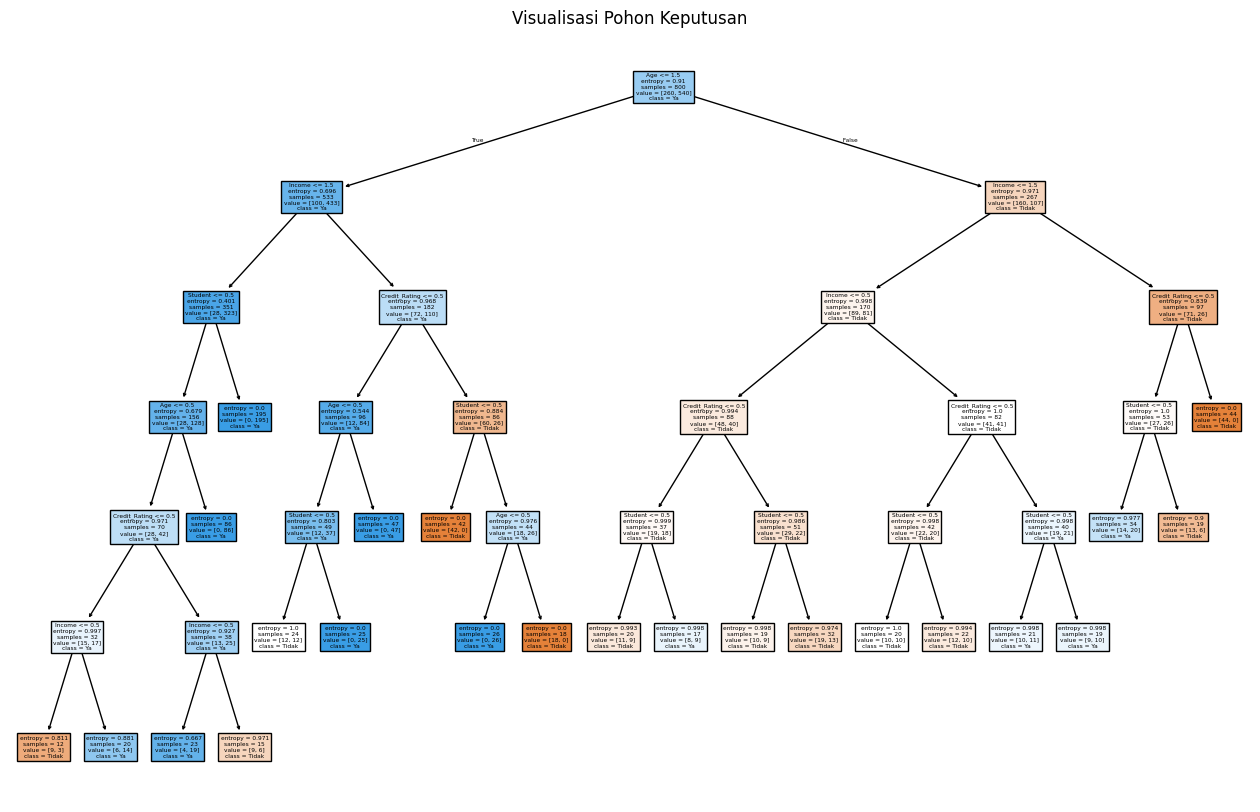

In [10]:
# Visualisasi pohon keputusan (opsional tapi direkomendasikan)
plt.figure(figsize=(16,10))
plot_tree(model, feature_names=X.columns, class_names=["Tidak", "Ya"], filled=True)
plt.title("Visualisasi Pohon Keputusan")
plt.show()

In [12]:
# Struktur pohon sebagai teks (opsional)
print("Struktur pohon (teks):")
print(export_text(model, feature_names=list(X.columns)))

Struktur pohon (teks):
|--- Age <= 1.50
|   |--- Income <= 1.50
|   |   |--- Student <= 0.50
|   |   |   |--- Age <= 0.50
|   |   |   |   |--- Credit_Rating <= 0.50
|   |   |   |   |   |--- Income <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Income >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Credit_Rating >  0.50
|   |   |   |   |   |--- Income <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Income >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Student >  0.50
|   |   |   |--- class: 1
|   |--- Income >  1.50
|   |   |--- Credit_Rating <= 0.50
|   |   |   |--- Age <= 0.50
|   |   |   |   |--- Student <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Student >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Credit_Rating >  0.50
|   |   |   |--- Student <= 0.50
|   |   |